In [1]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = datasets.fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = datasets.fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

# Question 1
Plot a hisgogram of the number of training documents for each of the 20 categories to check if they are evenly distributed

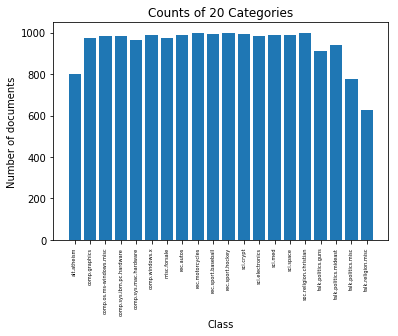

18846
([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984, 990, 987, 997, 910, 940, 775, 628], ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'])


In [3]:
#Collect the entire dataset fetch_20newsgroups
#windows path
#data=datasets.fetch_20newsgroups(data_home=r"D:\google drive file\study\UCLA\2020 winter\219\project 1\cache",subset='all')
#macOS path
data=datasets.fetch_20newsgroups(data_home="/Users/ethanwang/Google\ 云端硬盘/study/UCLA/2020\ winter/219/project\ 1/cache ",subset='all')
#Count the number of documents for each category
counts=[]
target_name=0
N=20
sum=0
i=0;j=0
sum=0
for i in range(N):
    count=np.sum(data.target==i)
    counts.append(count)
    sum=sum+count
#plot histogram
plt.bar(range(len(counts)),counts)
plt.xticks(range(N), (w for w in data.target_names))
plt.xticks(rotation=90,size=5)
plt.title('Counts of 20 Categories')
plt.xlabel('Class')
plt.ylabel('Number of documents')
plt.show()
print(sum)
print(counts,data.target_names)

# Question 2
Feature Extraction

In [4]:
from nltk import WordNetLemmatizer
from nltk import pos_tag
import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
#Define Stopwords, here we use stopwords in text package
stop_words=text.ENGLISH_STOP_WORDS
print("number of stop_words in sklearn text:%s" % len(stop_words))

number of stop_words in sklearn text:318


In [5]:
#Lemmatization
lemmatizer=WordNetLemmatizer()
#Define lemmatizer pos_tag to deal with adj, verb, noun and adv separately
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#Preprocessing: exclude some symbols and numbers in each sentence
exclude_sign="~#$%^&*(){}[]<>|+=1234567890"
replace_sign="@,.?!-;"
def preprocessing(data):
    processed_sentence=[]
    for i in range(len(data)):
        sentence=data[i]
        for c in exclude_sign:
            sentence=sentence.replace(c,"")
        for c in replace_sign:
            sentence=sentence.replace(c," ")
        processed_token=[lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]
        processed_sentence.append(" ".join(processed_token))
    return processed_sentence
#Training
processed_train_data=preprocessing(train_dataset.data)
processed_test_data=preprocessing(test_dataset.data)
vectorizer=CountVectorizer(stop_words='english',min_df=3)


In [6]:
#print(type(processed_train_data))
#print(np.shape(processed_train_data))

train_tf=vectorizer.fit_transform(processed_train_data)
test_tf=vectorizer.fit_transform(processed_test_data)


print(type(train_tf))
print(np.shape(train_tf))
print(np.shape(test_tf))

<class 'scipy.sparse.csr.csr_matrix'>
(4732, 15485)
(3150, 11250)


In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
TdT=TfidfTransformer()
TF_test=TdT.fit_transform(test_tf)
TF_train=TdT.fit_transform(train_tf)


print("TF_train has the shape as",np.shape(TF_train))
print("TF_test has the shape as",np.shape(TF_test))
print(type(TF_train))
print(type(TF_test))

('TF_train has the shape as', (4732, 15485))
('TF_test has the shape as', (3150, 11250))
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
feature_names=vectorizer.get_feature_names()
print(type(feature_names))
print('The number of features in training dataset is ')
print(np.shape(feature_names))
weight=TF_train.toarray()


<type 'list'>
The number of features in training dataset is 
(11254,)


In [16]:

weight=TF_train.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
dict={}

weight_overall=np.zeros([1,len(weight[0])])#collect all feature words frequency for specific categories

for i in range(weight.shape[0]):
    weight_overall=weight_overall+weight[i]
weight=weight_overall

print(weight[0])
print(np.shape(feature_names))
print(np.shape(weight))
print(type(weight))
print(len(weight[0]))

[16.57370787 17.34082719  6.3631521  ...  0.54448256  0.73441091
  0.42150961]
(11254,)
(1, 15488)
<type 'numpy.ndarray'>
15488


In [17]:
#sort the feature dictionary to see top features
for i in range(len(weight[0])):#打印每类文本的tf-idf词语权重 并排序
            if weight[0][i]!=0:
                dict[feature_names[i]]=weight[0][i]
#print(dict)
#print(sorted(dict.items(), key=lambda item:item[1], reverse=True))

IndexError: list index out of range